##Задание 2##

Борисов Д.А.

Вариант 1

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy

In [75]:
df_clear = pd.DataFrame()
df = pd.read_excel('Варианты заданий по темам 2-3.xlsx')
df_clear['xi'] = df['Вариант 1'].copy()
df_clear.head()

,xi
0,4.032661
1,7.485303
2,5.961668
3,1.508031
4,4.169277


In [76]:
import statistics
# мат ожидание
M = np.var(df_clear['xi'])
# размах, 
raz = np.ptp(df_clear['xi'])
# среднее,
m = statistics.mean(df_clear['xi'])
# моду 
mo = statistics.mode(df_clear['xi'])
# медиану, 
me = statistics.median(df_clear['xi'])
# дисперсию, 
D = statistics.variance(df_clear['xi'])
# С.К.О., 
SKO = statistics.stdev(df_clear['xi'])
# коэффициент вариации,
Kv = df_clear['xi'].std()/df_clear['xi'].mean()
# коэффициенты асимметрии, 
As = scipy.stats.skew(df_clear['xi'])
# эксцесса
Ex = scipy.stats.kurtosis(df_clear['xi'], fisher = False)

print('Мат ожидание = {M},'.format(M = M))
print('Размах = {raz},\nCреднее = {m},\nМедиана = {me},\nМода = {mo}'.format(raz = raz,m=m,me=me,mo=mo))
print('Димперсия = {D},\nС.К.О. = {SKO},\nКоэффициент вариации = {Kv},\nКоэффициенты асимметрии = {As},\nЭксцесса = {Ex},'.format(D = D,SKO=SKO,Kv=Kv,As=As,Ex=Ex))
print('max = {max}, ,min = {min}'.format(max = max(df_clear['xi']), min = min(df_clear['xi'])))

Мат ожидание = 4.329194353515196,
Размах = 10.884832590818405,
Cреднее = 4.766745804663515,
Медиана = 4.855659780223505,
Мода = 4.0326614351943135
Димперсия = 4.37292358940929,
С.К.О. = 2.0911536503588852,
Коэффициент вариации = 0.4386962796113479,
Коэффициенты асимметрии = 0.1787667671447735,
Эксцесса = 3.3751810908917035,
max = 10.575129762291908, ,min = -0.3097028285264969


In [44]:
# Тоже самое но экспресс анализом
scipy.stats.describe(df_clear['xi'])

DescribeResult(nobs=100, minmax=(-0.3097028285264969, 10.575129762291908), mean=4.766745804663515, variance=4.37292358940929, skewness=0.1787667671447735, kurtosis=0.3751810908917035)

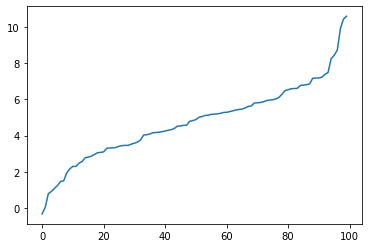

In [45]:
# Изобразим исходные данные в виже графика
Y = df_clear.sort_values('xi')['xi']
X = df.index.tolist()
plt.plot(X,Y)

In [47]:
# преположим что у нас нормальное распределение
# H0 - выборка не подчинена нормальному распределению
# H1 - выборка не подчинена нормальному распределию

In [ ]:
# Сводный df

df5 = pd.DataFrame()

# cчитаем границы интервало
interval_left = [] 
interval_right = [] 

dx = raz/10
count_right = min(df_clear['xi']) 
count_left = min(df_clear['xi'])
start = min(df_clear['xi'])

for i in range(10) :
    count_left = start + dx*i
    count_right = start + dx*(i+1)
    interval_left.append(float(count_left))
    interval_right.append(float(count_right))
    
df5['interval_left'] = interval_left
df5['interval_right'] = interval_right
df5.head(100)

# посчитаем кол-во вхождений
count_number = []
lendf5 = len(df5['interval_left'])
for i in range(lendf5) :   
    num = len(df_clear[(df_clear['xi'] >= df5['interval_left'][i]) & (df_clear['xi'] < df5['interval_right'][i])])
    if i == lendf5-1 :
        num = len(df_clear[(df_clear['xi'] >= df5['interval_left'][i]) & (df_clear['xi'] <= df5['interval_right'][i])])
    count_number.append(num)

df5['count'] = count_number   

print(df5['count'].sum(), len(df_clear['xi']))
df_clear.sort_values('xi').head(100)
df5.head(20)

# относительные частоты

df5['wi'] = df5['count']/df5['count'].sum()

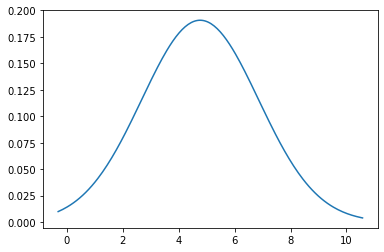

In [268]:

# посчитаем середину интервала

count = len(df5['interval_left'])

midle_list = []
for i in range(count) :
    midle = (df5['interval_left'][i] + df5['interval_right'][i])/2
    midle_list.append(round(midle,3))
    
df5['midle_interval'] = midle_list

df5.head(20)

# построим нормальное распредление с нашими параметрами
left = round(min(df5['interval_left']),3)
right = round(max(df5['interval_right']),3)

x = np.linspace(left,right,200)
# mu = M
# sigma = SKO
sigma = df_clear['xi'].std()
mu = df_clear['xi'].mean()

y = scipy.stats.norm.pdf(x, mu, sigma)
plt.plot(x,y)
# print(sum(norm_funct))
df5.head(20)

# узнаем значенеи функции в середине интервала

value_norm_func = []
for i in range(count) :
    
    midle_interval = df5['midle_interval'][i]
    
    x = midle_interval
#     mu = M
#     sigma = SKO
    
    sigma = df_clear['xi'].std()
    mu = df_clear['xi'].mean()
    
    y = scipy.stats.norm.pdf(x, mu, sigma)
    
    value_norm_func.append(y)
    
df5['value_norm_func'] = value_norm_func

df5.head(20)

# хочу добавить еще F(x) а не f(x)
value_norm_func_cdf = []

for i in range(count) :
    
    midle_interval = df5['midle_interval'][i]
    
    x = midle_interval
    mu = M
    sigma = SKO
    y = scipy.stats.norm.cdf(x, mu, sigma)
    
    value_norm_func_cdf.append(round(y,3))
    
df5['cdf'] = value_norm_func_cdf
df5.to_excel("Task_2_для_гист.xlsx") 

In [ ]:
# правильно наложенные графикик


x = np.linspace(df_clear['xi'].min()-1,df_clear['xi'].max()+1,100)
sigma = df_clear['xi'].std()
mu = df_clear['xi'].mean()

y = scipy.stats.norm(mu, sigma).pdf(x) 
plt.plot(x,y)   
df_clear['xi'].hist(bins=8, density=1)

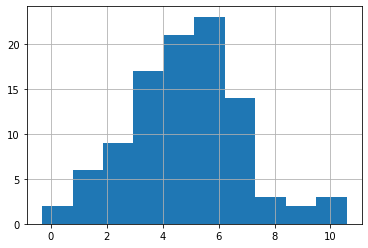

In [255]:
df_clear['xi'].hist(bins=10)

In [256]:
# left = round(min(df5['interval_left']),3)
# right = round(max(df5['interval_right']),3)

# x = np.linspace(right, right,1)
# mu = M
# sigma = SKO
# y = scipy.stats.norm.pdf(x, mu, sigma)

# print(y)

In [267]:
# добавиил накопленые частоты

lenf = len(df5['wi'])

count = 0
save_frequency = []
wi = df5['count'].tolist()
for i in range(lenf) :
    count = count + wi[i] 
    save_frequency.append(round(count,3))
# print(save_frequency)
df5['Накоп_част'] = save_frequency
# df5.head(20)

# добавим относительные накопленые частоты
V = df5['count'].sum()
df5['Накоп_част/n'] = df5['Накоп_част']/V

# умножили объем выьорки  на cdf
df5['npi'] = df5['cdf']*df5['count'].sum()
# df5.head(20)

# выпишем слогаемы для хи квадрат
df5['Хи'] = ((df5['Накоп_част'] - df5['npi'])**2)/df5['npi']

# наше значение хи квадрат
Hi2 = df5['Хи'].sum()
print(round(Hi2,3))
df5.head(20)
# округлили
df5 = df5.round({'interval_left':3,'interval_right':3,'value_norm_func':3,'Хи':3})

df5.to_excel("Task_2_для_идент.xlsx") 

0.645


In [262]:
# исходные данные
number_free = 8-2-1 # число степений свободы
alpha = 0.05 # уровень значимости
phi2_crit = 11.1 # уровень значимости 

Вывод: полученное значение Хи2 = 0.639, а критическое значение 11.1.
Гипотеза о что распределение является нормальным верна.

In [259]:
# тоже самое для критерия калмагорова
# Вычтем 2 столбца
list_freq = (df5['Накоп_част/n'] - df5['cdf']).tolist()
list_freq = [round(abs(x),3) for x in list_freq]
max(list_freq)

0.042

In [260]:
# уровень значимости 
# Область принятия гипотезы
alpha = 0.05

K1_alpha = np.sqrt(-0.5*np.log2(alpha))
count_f = df5['Накоп_част/n'].sum()
print('Итоговый интервал принятия гипотезы (0, {K1_alpha})'.format(K1_alpha = K1_alpha*1/count_f))

Итоговый интервал принятия гипотезы (0, 0.25432902849193256)


Вывод: Значение 0.042 попадаеют в интервал принятия гипотезы, значит гипотеза что распределенеи является нормальным верная.

# *******Второй расчет*******###

In [198]:
def MainParameter(df_clear) :

    # мат ожидание
    M = np.var(df_clear['xi'])
    # С.К.О., 
    SKO = statistics.stdev(df_clear['xi'])
    # размах, 
    raz = np.ptp(df_clear['xi'])


    df_clear = pd.DataFrame()
    df = pd.read_excel('Варианты заданий по темам 2-3.xlsx')
    df_clear['xi'] = df['Вариант 1'].copy()

    # Сводный df
    df5 = pd.DataFrame()

    # 1 - cчитаем границы интервало
    interval_left = [] 
    interval_right = [] 

    dx = raz/10
    count_right = min(df_clear['xi']) 
    count_left = min(df_clear['xi'])
    start = min(df_clear['xi'])

    for i in range(10) :
        count_left = start + dx*i
        count_right = start + dx*(i+1)
        interval_left.append(round(float(count_left),3))
        interval_right.append(round(float(count_right),3))

    df5['interval_left'] = interval_left
    df5['interval_right'] = interval_right

    # 2 - посчитаем кол-во вхождений
    count_number = []
    lendf5 = len(df5['interval_left'])
    for i in range(lendf5) :   
        num = len(df_clear[(df_clear['xi'] >= df5['interval_left'][i]) & (df_clear['xi'] < df5['interval_right'][i])])
        if i == lendf5-1 :
            num = len(df_clear[(df_clear['xi'] >= df5['interval_left'][i]) & (df_clear['xi'] <= df5['interval_right'][i])])
        count_number.append(round(num,3))
    df5['count'] = count_number   

    # 3 - относительные частоты
    df5['wi'] = df5['count']/df5['count'].sum()
    df5 = df5.round({'wi':3})
    
    # 4 - посчитаем середину интервала
    count = len(df5['interval_left'])
    midle_list = []
    for i in range(count) :
        midle = (df5['interval_left'][i] + df5['interval_right'][i])/2
        midle_list.append(round(midle,3))    
    df5['midle_interval'] = midle_list

    # 7 - добавиил накопленые частоты
    lenf = len(df5['wi'])

    count = 0
    save_frequency = []
    wi = df5['count'].tolist()
    for i in range(lenf) :
        count = count + wi[i] 
        save_frequency.append(round(count,3))
    df5['Накоп_част'] = save_frequency

    # 8 - добавим относительные накопленые частоты
    V = df5['count'].sum()
    df5['Накоп_част/n'] = df5['Накоп_част']/V
    df5 = df5.round({'Накоп_част/n':3})
    return df5


In [206]:
# создадим новый ДФ и основыне поля заполним через функцию

a = pd.DataFrame()
a = MainParameter(df_clear)
a = a.round({'wi':3})
a.head()

,interval_left,interval_right,count,wi,midle_interval,Накоп_част,Накоп_част/n
0,-0.310,0.779,2,0.020,0.234,2,0.020
1,0.779,1.867,6,0.061,1.323,8,0.081
2,1.867,2.956,9,0.091,2.412,17,0.172
3,2.956,4.044,17,0.172,3.500,34,0.343
4,4.044,5.133,21,0.212,4.588,55,0.556


In [239]:
# создали новый ДФ через функцию
a = pd.DataFrame()
a = MainParameter(df_clear)
a.head()

#5 - узнаем значенеи функции в середине интервала
value_norm_func = []
for i in range(a.shape[0]) :

    midle_interval = a['midle_interval'][i]

    x = midle_interval
    A_param = df_clear['xi'].min()
    B_param = df_clear['xi'].max()
#     y = scipy.stats.uniform.cdf(x, A_param, B_param)

    loc = A_param
    scale = B_param - A_param
    y = scipy.stats.uniform(loc, scale).cdf(x)
    
    value_norm_func.append(round(y,3))
    
    
a['pdf'] = value_norm_func

#6 - хочу добавить еще F(x) а не f(x)
value_norm_func_cdf = []

for i in range(a.shape[0]) :

    midle_interval = a['midle_interval'][i]

    x = midle_interval
    A_param = df_clear['xi'].min()
    B_param = df_clear['xi'].max()
#     y = scipy.stats.uniform.cdf(x, A_param, B_param)
    
    loc = A_param
    scale = B_param - A_param
    y = scipy.stats.uniform(loc, scale).cdf(x)
    
    value_norm_func_cdf.append(round(y,3))

a['cdf'] = value_norm_func_cdf

# 9 - умножили объем выьорки  на cdf
a['npi'] = a['cdf']*a['count'].sum()

# 10 - выпишем слогаемы для хи квадрат
a['Хи'] = ((a['Накоп_част'] - a['npi'])**2)/a['npi']
a =  a.round({'Хи':3})

# 11 - расчетное значение хи квадрат
Hi2 = a['Хи'].sum()
print(round(Hi2,3))
a.head(10)

# a.to_excel("Task_2_второй_расчет.xlsx")

39.897


Число степеней свободы также будет 5
Уровень значимости alpha = 0.05
Тогда критическое значение Хи = 11.1

In [269]:
Вывод: полученное значение Хи2 =39.897, а критическое значение 11.1. Гипотеза о что распределение является нормальным верна.



SyntaxError: invalid syntax (<ipython-input-269-967832d4705c>, line 1)

-0.3097028285264969 10.575129762291908


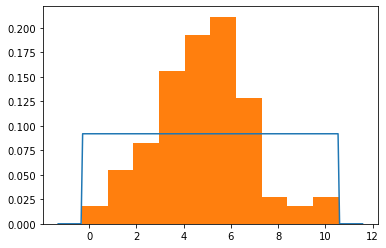

In [238]:
# нарисуем наши распределения

N = 200

A_param = df_clear['xi'].min()
B_param = df_clear['xi'].max()

grid = np.linspace(A_param-1,B_param+1,N)
loc = A_param
scale = B_param - A_param
y2 = scipy.stats.uniform(loc, scale).pdf(grid)  
plt.plot(grid,y2)
plt.hist(df_clear['xi'], density=1, range=[A_param, B_param])

# y3 = np.linspace(0,0.2,len(x2) )
# x3 = [B_param]*len(x2) 
# plt.plot(x3,y3)
print(A_param, B_param)

In [237]:
# тоже самое для критерия калмагорова
# Вычтем 2 столбца
list_freq = (a['Накоп_част/n'] - a['cdf']).tolist()
list_freq = [round(abs(x),3) for x in list_freq]
print('Расчетное значение критерия',max(list_freq))

# уровень значимости 
# Область принятия гипотезы
alpha = 0.05

K1_alpha = np.sqrt(-0.5*np.log2(alpha))
count_f = df5['Накоп_част/n'].sum()
print('Итоговый интервал принятия гипотезы (0, {K1_alpha})'.format(K1_alpha = K1_alpha*1/count_f))

Расчетное значение критерия 0.279
Итоговый интервал принятия гипотезы (0, 0.25432902849193256)
